In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = [10.00, 6.50]
plt.rcParams["figure.autolayout"] = True

In [139]:
df1 = pd.read_csv('../data/4-Way-Analysis-Dynamic.csv')
df1.index = df1.index + 1
df1.rename(columns={'Total':'Total(D)'},inplace=True)
df1.head(16)

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(D)
1,0.00,0.00,0.00,1.00,0,0,0,269,269
2,0.00,0.00,0.50,0.50,0,0,146,158,304
3,0.00,0.30,0.30,0.40,0,102,80,120,302
4,0.25,0.25,0.25,0.25,94,86,74,82,336
5,0.30,0.30,0.20,0.20,101,114,57,66,338
6,0.50,0.20,0.20,0.10,177,77,76,27,357
7,0.30,0.20,0.30,0.20,94,76,111,65,346
8,0.70,0.10,0.10,0.10,229,32,37,32,330
9,0.50,0.40,0.05,0.05,148,130,26,17,321
10,0.30,0.30,0.30,0.10,99,99,90,38,326


In [140]:
df2 = pd.read_csv('../data/4-Way-Analysis-Static.csv')
df2.index = df2.index + 1
df2.rename(columns={'Total':'Total(S)'},inplace=True)
df2.head(16)

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(S)
1,0.00,0.00,0.00,1.00,0,0,0,188,188
2,0.00,0.00,0.50,0.50,0,0,109,117,226
3,0.00,0.30,0.30,0.40,0,120,69,81,270
4,0.25,0.25,0.25,0.25,72,92,58,60,282
5,0.30,0.30,0.20,0.20,88,99,45,55,287
6,0.50,0.20,0.20,0.10,139,75,53,24,291
7,0.30,0.20,0.30,0.20,76,75,84,52,287
8,0.70,0.10,0.10,0.10,180,46,36,17,279
9,0.50,0.40,0.05,0.05,133,131,20,16,300
10,0.30,0.30,0.30,0.10,87,110,71,32,300


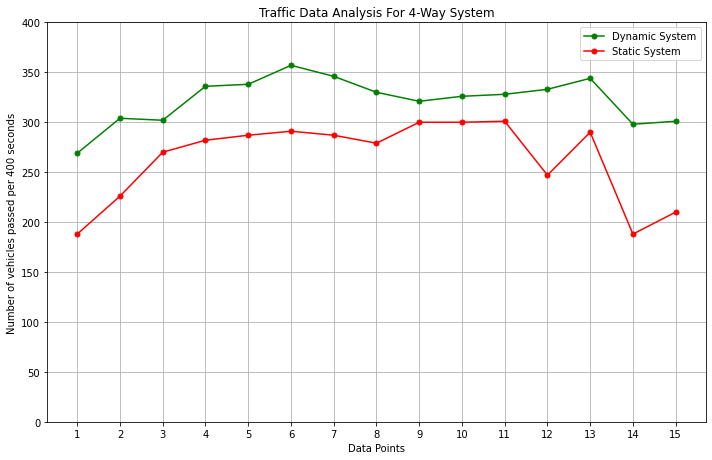

In [141]:
plt.plot(df1.index, df1['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df2.index, df2['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 400 seconds")
plt.title("Traffic Data Analysis For 4-Way System")
  
plt.grid(True)
plt.ylim(0, 400)
plt.xticks(df1.index)
plt.legend()
plt.savefig('4-Way-VehicleAnalysis-Plot.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [142]:
percentImprovement = []
for i in range(1,16):
        percentImprovement.append(((df1['Total(D)'][i] - df2['Total(S)'][i])/(df2['Total(S)'][i]))*100)

print(percentImprovement)

leastImprovementAreas = [x+1 for x in range(len(percentImprovement)) if(percentImprovement[x]<11)]
print(leastImprovementAreas)

[43.08510638297872, 34.51327433628318, 11.851851851851853, 19.148936170212767, 17.770034843205575, 22.68041237113402, 20.557491289198605, 18.27956989247312, 7.000000000000001, 8.666666666666668, 8.970099667774086, 34.81781376518219, 18.620689655172416, 58.51063829787234, 43.333333333333336]
[9, 10, 11]


In [168]:
sum = 0
for i in range(len(percentImprovement)):
    sum += percentImprovement[i]

print(sum/15)
    

24.52039456822259


In [145]:
df = pd.concat([df1,df2],  axis=1)
df['Improvement(%Age)'] = percentImprovement
df

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(D),P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(S),Improvement(%Age)
1,0.00,0.00,0.00,1.00,0,0,0,269,269,0.00,0.00,0.00,1.00,0,0,0,188,188,43.085106
2,0.00,0.00,0.50,0.50,0,0,146,158,304,0.00,0.00,0.50,0.50,0,0,109,117,226,34.513274
3,0.00,0.30,0.30,0.40,0,102,80,120,302,0.00,0.30,0.30,0.40,0,120,69,81,270,11.851852
4,0.25,0.25,0.25,0.25,94,86,74,82,336,0.25,0.25,0.25,0.25,72,92,58,60,282,19.148936
5,0.30,0.30,0.20,0.20,101,114,57,66,338,0.30,0.30,0.20,0.20,88,99,45,55,287,17.770035
6,0.50,0.20,0.20,0.10,177,77,76,27,357,0.50,0.20,0.20,0.10,139,75,53,24,291,22.680412
7,0.30,0.20,0.30,0.20,94,76,111,65,346,0.30,0.20,0.30,0.20,76,75,84,52,287,20.557491
8,0.70,0.10,0.10,0.10,229,32,37,32,330,0.70,0.10,0.10,0.10,180,46,36,17,279,18.279570
9,0.50,0.40,0.05,0.05,148,130,26,17,321,0.50,0.40,0.05,0.05,133,131,20,16,300,7.000000
10,0.30,0.30,0.30,0.10,99,99,90,38,326,0.30,0.30,0.30,0.10,87,110,71,32,300,8.666667


In [ ]:
###################### Case 9 ###############################

In [150]:
df5 = pd.read_csv('../data/4-Way-Analysis-Dynamic-Case-9.csv')
df5.index = df5.index + 1
df5.rename(columns={'Total':'Total(D)'},inplace=True)
df5.head(16)

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(D)
1,0.5,0.4,0.05,0.05,148,130,26,17,321
2,0.5,0.4,0.05,0.05,151,126,23,21,321
3,0.5,0.4,0.05,0.05,151,142,12,13,318
4,0.5,0.4,0.05,0.05,159,144,7,19,329
5,0.5,0.4,0.05,0.05,131,149,22,22,324


In [152]:
df6 = pd.read_csv('../data/4-Way-Analysis-Static-Case-9.csv')
df6.index = df6.index + 1
df6.rename(columns={'Total':'Total(S)'},inplace=True)
df6.head(16)

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(S)
1,0.5,0.4,0.05,0.05,133,131,20,16,300
2,0.5,0.4,0.05,0.05,124,151,22,8,305
3,0.5,0.4,0.05,0.05,137,144,15,11,307
4,0.5,0.4,0.05,0.05,134,138,19,14,305
5,0.5,0.4,0.05,0.05,165,131,15,9,320


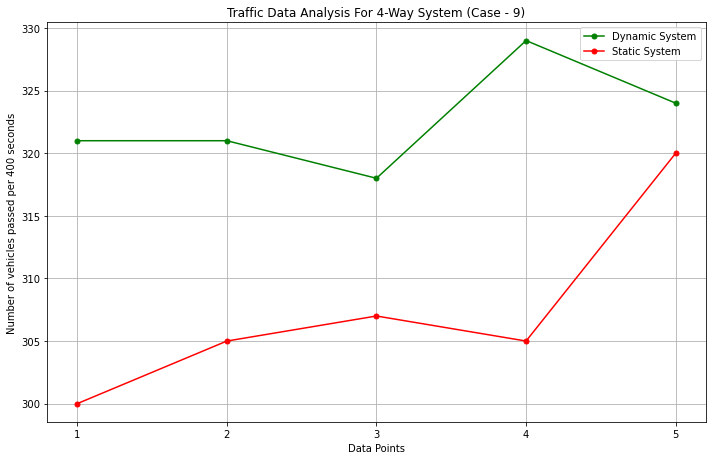

In [155]:
plt.plot(df5.index, df5['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df6.index, df6['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 400 seconds")
plt.title("Traffic Data Analysis For 4-Way System (Case - 9)")
  
plt.grid(True)
# plt.ylim(0, 300)
plt.xticks(df5.index)
plt.legend()
plt.savefig('4-Way-VehicleAnalysis-Plot-Case-9.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
###################### Case 10 ###############################

In [156]:
df7 = pd.read_csv('../data/4-Way-Analysis-Dynamic-Case-10.csv')
df7.index = df7.index + 1
df7.rename(columns={'Total':'Total(D)'},inplace=True)
df7.head(16)

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(D)
1,0.3,0.3,0.3,0.1,99,99,90,38,326
2,0.3,0.3,0.3,0.1,111,93,91,39,334
3,0.3,0.3,0.3,0.1,108,79,113,30,330
4,0.3,0.3,0.3,0.1,110,84,101,26,321
5,0.3,0.3,0.3,0.1,111,109,79,36,335


In [157]:
df8 = pd.read_csv('../data/4-Way-Analysis-Static-Case-10.csv')
df8.index = df8.index + 1
df8.rename(columns={'Total':'Total(S)'},inplace=True)
df8.head(16)

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(S)
1,0.3,0.3,0.3,0.1,87,110,71,32,300
2,0.3,0.3,0.3,0.1,77,102,63,36,278
3,0.3,0.3,0.3,0.1,83,107,72,22,284
4,0.3,0.3,0.3,0.1,80,110,71,21,282
5,0.3,0.3,0.3,0.1,82,93,84,29,288


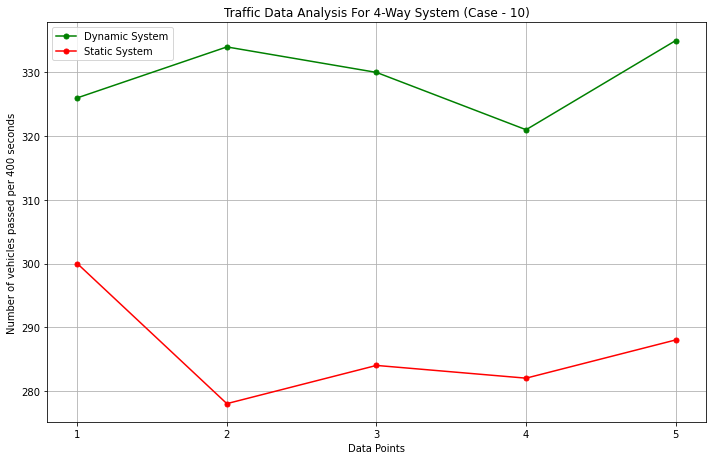

In [159]:
plt.plot(df7.index, df7['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df8.index, df8['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 400 seconds")
plt.title("Traffic Data Analysis For 4-Way System (Case - 10)")
  
plt.grid(True)
# plt.ylim(0, 300)
plt.xticks(df7.index)
plt.legend()
plt.savefig('4-Way-VehicleAnalysis-Plot-Case-10.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
###################### Case 11 ###############################

In [160]:
df9 = pd.read_csv('../data/4-Way-Analysis-Dynamic-Case-11.csv')
df9.index = df9.index + 1
df9.rename(columns={'Total':'Total(D)'},inplace=True)
df9.head(16)

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(D)
1,0.2,0.5,0.05,0.25,69,150,17,92,328
2,0.2,0.5,0.05,0.25,58,162,17,96,333
3,0.2,0.5,0.05,0.25,71,165,21,88,345
4,0.2,0.5,0.05,0.25,63,153,19,93,328
5,0.2,0.5,0.05,0.25,60,162,19,89,330


In [162]:
df10 = pd.read_csv('../data/4-Way-Analysis-Static-Case-11.csv')
df10.index = df10.index + 1
df10.rename(columns={'Total':'Total(S)'},inplace=True)
df10.head(16)

,P1,P2,P3,P4,Lane1,Lane2,Lane3,Lane4,Total(S)
1,0.2,0.5,0.05,0.25,63,157,20,61,301
2,0.2,0.5,0.05,0.25,69,165,10,63,307
3,0.2,0.5,0.05,0.25,54,175,8,70,307
4,0.2,0.5,0.05,0.25,61,163,19,64,307
5,0.2,0.5,0.05,0.25,61,162,17,55,295


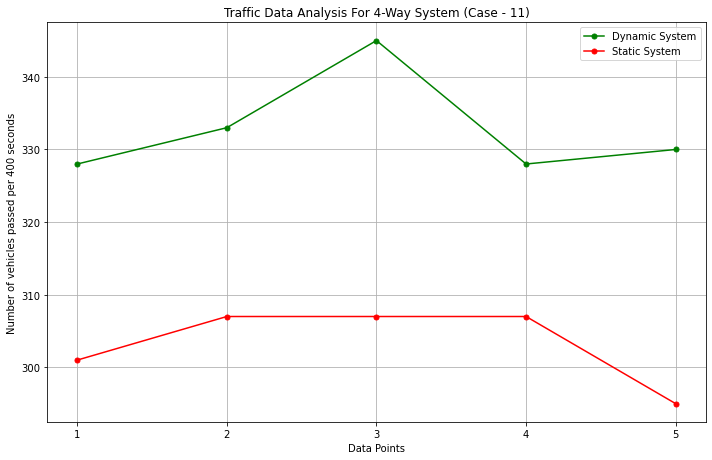

In [163]:
plt.plot(df9.index, df9['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df10.index, df10['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 400 seconds")
plt.title("Traffic Data Analysis For 4-Way System (Case - 11)")
  
plt.grid(True)
# plt.ylim(0, 300)
plt.xticks(df9.index)
plt.legend()
plt.savefig('4-Way-VehicleAnalysis-Plot-Case-11.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [110]:
df3 = pd.read_csv('../data/3-Way-Analysis-Dynamic.csv')
df3.index = df3.index + 1
df3.rename(columns={'Total':'Total(D)'},inplace=True)
df3.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(D)
1,0.000,0.000,1.000,0,0,257,257
2,0.000,0.500,0.500,0,113,113,226
3,0.000,0.600,0.400,0,119,97,216
4,0.333,0.333,0.334,74,93,61,228
5,0.300,0.500,0.200,65,126,42,233
6,0.500,0.400,0.100,100,113,29,242
7,0.500,0.300,0.200,107,80,40,227
8,0.700,0.200,0.100,185,38,29,252
9,0.500,0.450,0.050,123,111,11,245
10,0.300,0.600,0.100,73,161,18,252


In [113]:
df4 = pd.read_csv('../data/3-Way-Analysis-Static.csv')
df4.index = df4.index + 1
df4.rename(columns={'Total':'Total(S)'},inplace=True)
df4.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(S)
1,0.000,0.000,1.000,0,0,133,133
2,0.000,0.500,0.500,0,126,76,202
3,0.000,0.600,0.400,0,134,66,200
4,0.333,0.333,0.334,68,90,55,213
5,0.300,0.500,0.200,74,126,28,228
6,0.500,0.400,0.100,100,109,14,223
7,0.500,0.300,0.200,108,81,32,221
8,0.700,0.200,0.100,142,51,13,206
9,0.500,0.450,0.050,109,115,10,234
10,0.300,0.600,0.100,66,144,16,226


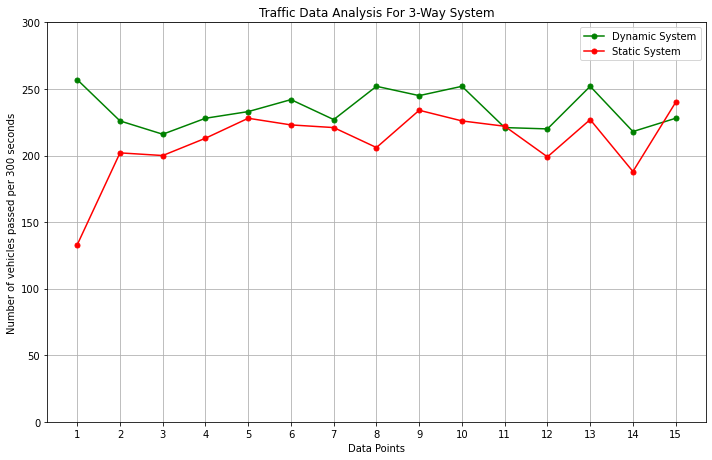

In [114]:
plt.plot(df3.index, df3['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df4.index, df4['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 300 seconds")
plt.title("Traffic Data Analysis For 3-Way System")
  
plt.grid(True)
plt.ylim(0, 300)
plt.xticks(df3.index)
plt.legend()
plt.savefig('3-Way-VehicleAnalysis-Plot.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [169]:
percentImprovement = []
for i in range(1,16):
        percentImprovement.append(((df3['Total(D)'][i] - df4['Total(S)'][i])/(df4['Total(S)'][i]))*100)

print(percentImprovement)

leastImprovementAreas = [x+1 for x in range(len(percentImprovement)) if(percentImprovement[x]<11)]
print(leastImprovementAreas)

[93.23308270676691, 11.881188118811881, 8.0, 7.042253521126761, 2.1929824561403506, 8.520179372197308, 2.7149321266968327, 22.330097087378643, 4.700854700854701, 11.504424778761061, -0.45045045045045046, 10.552763819095476, 11.013215859030836, 15.957446808510639, -5.0]
[3, 4, 5, 6, 7, 9, 11, 12, 15]


In [170]:
sum = 0
for i in range(len(percentImprovement)):
    sum += percentImprovement[i]

print(sum/15)

13.61286472699473


In [117]:
df = pd.concat([df3,df4],  axis=1)
df['Improvement(%Age)'] = percentImprovement
df

,P1,P2,P3,Lane1,Lane2,Lane3,Total(D),P1,P2,P3,Lane1,Lane2,Lane3,Total(S),Improvement(%Age)
1,0.000,0.000,1.000,0,0,257,257,0.000,0.000,1.000,0,0,133,133,93.233083
2,0.000,0.500,0.500,0,113,113,226,0.000,0.500,0.500,0,126,76,202,11.881188
3,0.000,0.600,0.400,0,119,97,216,0.000,0.600,0.400,0,134,66,200,8.000000
4,0.333,0.333,0.334,74,93,61,228,0.333,0.333,0.334,68,90,55,213,7.042254
5,0.300,0.500,0.200,65,126,42,233,0.300,0.500,0.200,74,126,28,228,2.192982
6,0.500,0.400,0.100,100,113,29,242,0.500,0.400,0.100,100,109,14,223,8.520179
7,0.500,0.300,0.200,107,80,40,227,0.500,0.300,0.200,108,81,32,221,2.714932
8,0.700,0.200,0.100,185,38,29,252,0.700,0.200,0.100,142,51,13,206,22.330097
9,0.500,0.450,0.050,123,111,11,245,0.500,0.450,0.050,109,115,10,234,4.700855
10,0.300,0.600,0.100,73,161,18,252,0.300,0.600,0.100,66,144,16,226,11.504425


In [ ]:
###################### Case 3 ###############################

In [4]:
df11 = pd.read_csv('../data/CaseStudy/3-Way-System/3-Way-Analysis-Dynamic-Case-3.csv')
df11.index = df11.index + 1
df11.rename(columns={'Total':'Total(D)'},inplace=True)
df11.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(D)
1,0.0,0.6,0.4,0,119,97,216
2,0.0,0.6,0.4,0,122,91,213
3,0.0,0.6,0.4,0,119,100,219
4,0.0,0.6,0.4,0,106,111,217
5,0.0,0.6,0.4,0,140,90,230


In [5]:
df12 = pd.read_csv('../data/CaseStudy/3-Way-System/3-Way-Analysis-Static-Case-3.csv')
df12.index = df12.index + 1
df12.rename(columns={'Total':'Total(S)'},inplace=True)
df12.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(S)
1,0.0,0.6,0.4,0,134,66,200
2,0.0,0.6,0.4,0,161,64,225
3,0.0,0.6,0.4,0,170,60,230
4,0.0,0.6,0.4,0,140,64,204
5,0.0,0.6,0.4,0,135,72,207


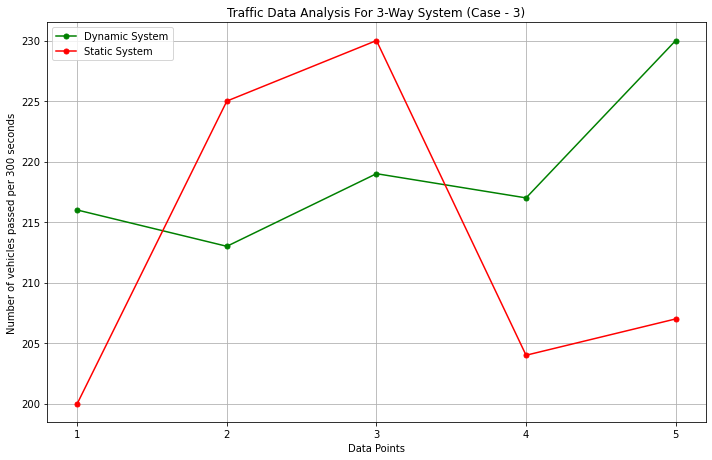

In [7]:
plt.plot(df11.index, df11['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df12.index, df12['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 300 seconds")
plt.title("Traffic Data Analysis For 3-Way System (Case - 3)")
  
plt.grid(True)
# plt.ylim(0, 300)
plt.xticks(df11.index)
plt.legend()
plt.savefig('3-Way-VehicleAnalysis-Plot-Case-3.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
###################### Case 5 ###############################

In [8]:
df13 = pd.read_csv('../data/CaseStudy/3-Way-System/3-Way-Analysis-Dynamic-Case-5.csv')
df13.index = df13.index + 1
df13.rename(columns={'Total':'Total(D)'},inplace=True)
df13.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(D)
1,0.3,0.5,0.2,65,126,42,233
2,0.3,0.5,0.2,74,104,43,221
3,0.3,0.5,0.2,78,104,43,225
4,0.3,0.5,0.2,70,119,49,238
5,0.3,0.5,0.2,77,135,45,257


In [9]:
df14 = pd.read_csv('../data/CaseStudy/3-Way-System/3-Way-Analysis-Static-Case-5.csv')
df14.index = df14.index + 1
df14.rename(columns={'Total':'Total(S)'},inplace=True)
df14.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(S)
1,0.3,0.5,0.2,74,126,28,228
2,0.3,0.5,0.2,70,137,31,238
3,0.3,0.5,0.2,74,127,46,247
4,0.3,0.5,0.2,75,124,34,233
5,0.3,0.5,0.2,66,124,37,227


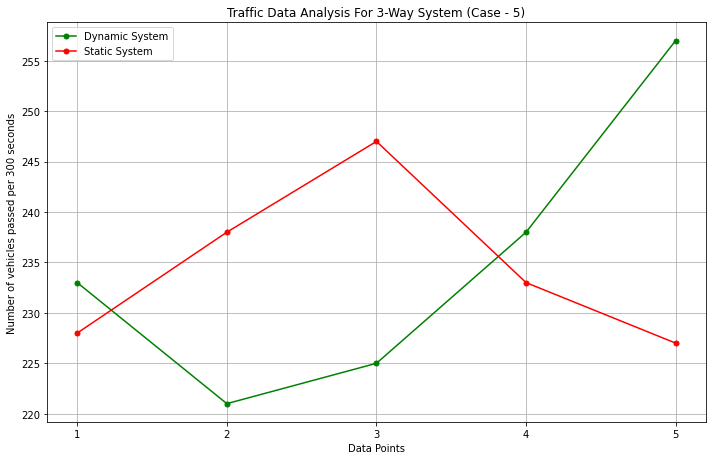

In [10]:
plt.plot(df13.index, df13['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df14.index, df14['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 300 seconds")
plt.title("Traffic Data Analysis For 3-Way System (Case - 5)")
  
plt.grid(True)
# plt.ylim(0, 300)
plt.xticks(df11.index)
plt.legend()
plt.savefig('3-Way-VehicleAnalysis-Plot-Case-5.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
###################### Case 11 ###############################

In [11]:
df15 = pd.read_csv('../data/CaseStudy/3-Way-System/3-Way-Analysis-Dynamic-Case-11.csv')
df15.index = df15.index + 1
df15.rename(columns={'Total':'Total(D)'},inplace=True)
df15.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(D)
1,0.2,0.55,0.25,53,109,59,221
2,0.2,0.55,0.25,48,140,54,242
3,0.2,0.55,0.25,57,143,47,247
4,0.2,0.55,0.25,35,148,52,235
5,0.2,0.55,0.25,55,149,45,249


In [12]:
df16 = pd.read_csv('../data/CaseStudy/3-Way-System/3-Way-Analysis-Static-Case-11.csv')
df16.index = df16.index + 1
df16.rename(columns={'Total':'Total(S)'},inplace=True)
df16.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(S)
1,0.2,0.55,0.25,48,131,43,222
2,0.2,0.55,0.25,41,137,47,225
3,0.2,0.55,0.25,43,133,43,219
4,0.2,0.55,0.25,42,141,43,226
5,0.2,0.55,0.25,58,123,41,222


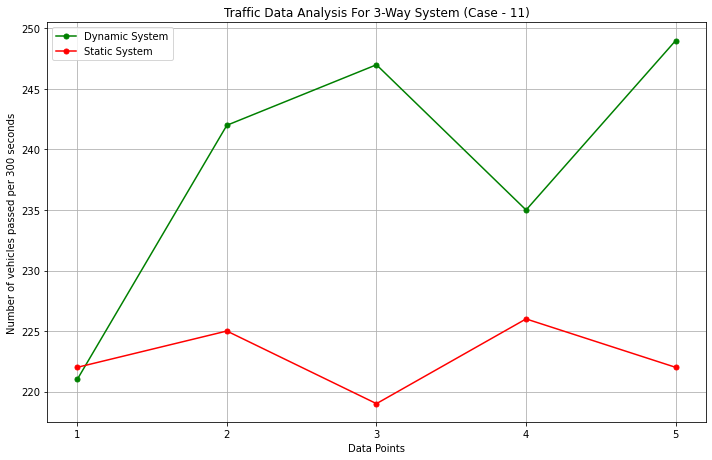

In [13]:
plt.plot(df15.index, df15['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df16.index, df16['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 300 seconds")
plt.title("Traffic Data Analysis For 3-Way System (Case - 11)")
  
plt.grid(True)
# plt.ylim(0, 300)
plt.xticks(df11.index)
plt.legend()
plt.savefig('3-Way-VehicleAnalysis-Plot-Case-11.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
###################### Case 15 ###############################

In [14]:
df17 = pd.read_csv('../data/CaseStudy/3-Way-System/3-Way-Analysis-Dynamic-Case-15.csv')
df17.index = df17.index + 1
df17.rename(columns={'Total':'Total(D)'},inplace=True)
df17.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(D)
1,0.85,0.1,0.05,193,18,17,228
2,0.85,0.1,0.05,222,24,13,259
3,0.85,0.1,0.05,205,30,14,249
4,0.85,0.1,0.05,183,24,13,220
5,0.85,0.1,0.05,190,24,7,221


In [15]:
df18 = pd.read_csv('../data/CaseStudy/3-Way-System/3-Way-Analysis-Static-Case-15.csv')
df18.index = df18.index + 1
df18.rename(columns={'Total':'Total(S)'},inplace=True)
df18.head(16)

,P1,P2,P3,Lane1,Lane2,Lane3,Total(S)
1,0.85,0.1,0.05,194,31,15,240
2,0.85,0.1,0.05,157,30,12,199
3,0.85,0.1,0.05,155,28,11,194
4,0.85,0.1,0.05,164,22,8,194
5,0.85,0.1,0.05,195,28,7,230


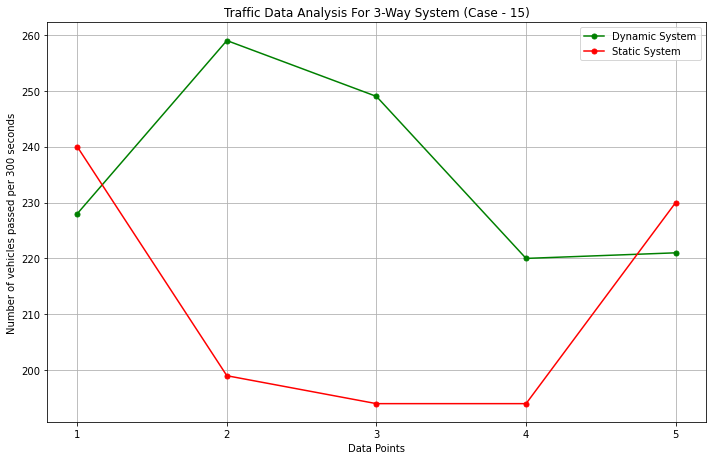

In [16]:
plt.plot(df17.index, df17['Total(D)'], color='g', label='Dynamic System',marker = 'o',
         markerfacecolor = 'g', markersize = 5)

plt.plot(df18.index, df18['Total(S)'], color='r', label='Static System',marker = 'o',
         markerfacecolor = 'r', markersize = 5)

plt.xlabel("Data Points")
plt.ylabel("Number of vehicles passed per 300 seconds")
plt.title("Traffic Data Analysis For 3-Way System (Case - 15)")
  
plt.grid(True)
# plt.ylim(0, 300)
plt.xticks(df17.index)
plt.legend()
plt.savefig('3-Way-VehicleAnalysis-Plot-Case-15.jpg', bbox_inches='tight', dpi=100)
plt.show()

In [60]:
from PIL import Image

In [241]:
img=Image.open("../images/left/bus.png")

In [242]:
print(img.size)

(76, 26)


In [243]:
img

In [377]:
img2 = Image.open("../images/up/fireTruck.png")

In [378]:
print(img2.size)

(35, 80)


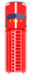

In [381]:
img2

In [380]:
img2 = img2.resize((33,80))

In [382]:
img2.save("../images/up/fireTruck.png")

In [66]:
img2 = Image.open('../images/left/car.png')

In [87]:
print(img.size, img2.size)

(45, 30) (54, 22)


In [89]:
img.show()

In [116]:
img = img.resize((50,30))

In [84]:
img.save("../images/left/ambulance.png")

In [55]:
# removing the background in an image
import cv2
import numpy as np

# load image
img = cv2.imread("../images/left/police-car.png")

# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('../images/left/police-car.png', result)


True